**This notebook has implementation of common network optimization algorithms for solving the travelling salesman problem on random city coordinates set.**


---


**Structure:**

1. Imports
2. Parameter Initialization
3. Implementation:

*   Neirest Neighbor
*   Neirest Neighbor + 2-Opt
*   Simulated Annealing
*   Christofides algorithm
*   Ant Colony Optimization
*   Nearest Neighbor + 3-Opt
*   Christofides algorithm
*   LKH-3
*   Concorde
*   Concorde + 2-Opt


4. Visualizations


---


Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random

from typing import List, Tuple
from multiprocessing import Pool, cpu_count
from functools import lru_cache
from scipy.spatial.distance import pdist, squareform

Initial Set-Up

In [ ]:
# Generate a small dataset of city coordinates
np.random.seed(42)
num_cities = 50 # change this parameter to test number of cities
cities = np.random.rand(num_cities, 2)

# Calculate the distance matrix
dist_matrix = squareform(pdist(cities))

# Function to calculate total distance of a route
@lru_cache(maxsize=None)
def calculate_distance(route):
    return sum(dist_matrix[route[i], route[i+1]] for i in range(len(route)-1)) + dist_matrix[route[-1], route[0]]

1st Implementation Batch


Running Nearest Neighbor...
Nearest Neighbor - Distance: 7.3786, Time: 0.00 seconds

Running 2-Opt for Nearest Neighbor...
2-Opt current distance: 5.8921
2-Opt current distance: 5.8921
2-Opt current distance: 7.1415
2-Opt current distance: 6.7405
2-Opt current distance: 6.5316
2-Opt current distance: 6.5080
2-Opt current distance: 6.5080
2-Opt for Nearest Neighbor - Distance: 5.8921, Time: 0.21 seconds

Running Simulated Annealing...
SA iteration 0, current distance: 24.8778
SA iteration 100, current distance: 27.2935
SA iteration 200, current distance: 26.9336
SA iteration 300, current distance: 27.5984
SA iteration 400, current distance: 25.1711
SA iteration 500, current distance: 25.9832
SA iteration 600, current distance: 26.8304
SA iteration 700, current distance: 25.5306
SA iteration 800, current distance: 27.5043
SA iteration 900, current distance: 24.3777
SA iteration 1000, current distance: 23.9898
SA iteration 1100, current distance: 25.4856
SA iteration 1200, current distan

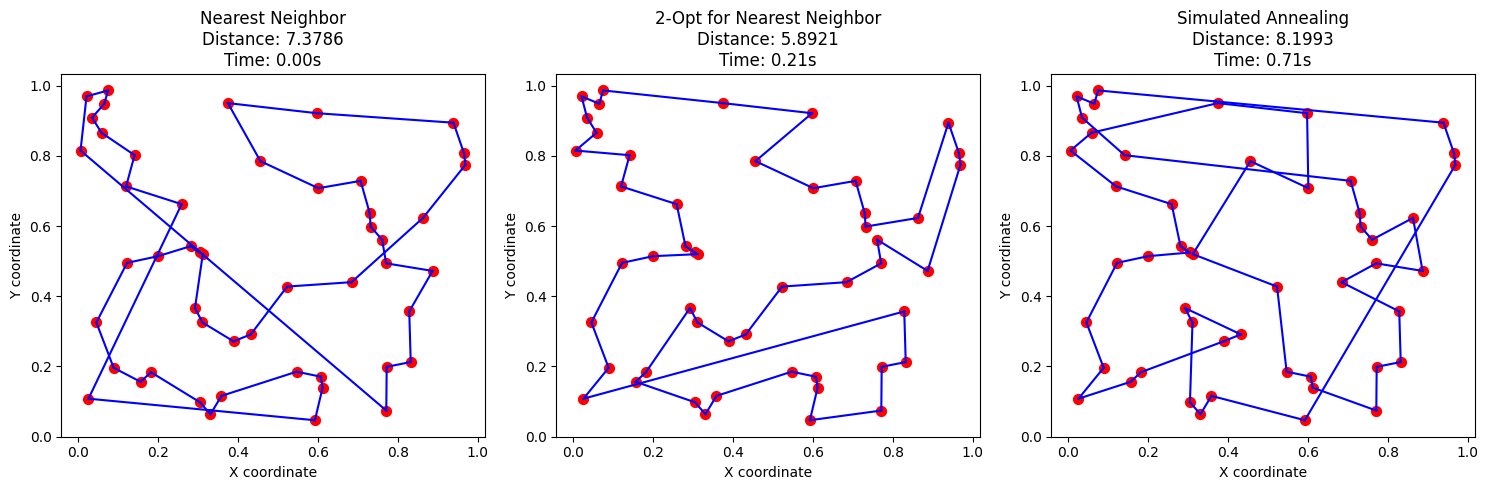


Summary:
Nearest Neighbor: Distance = 7.3786, Time = 0.00 seconds
2-Opt for Nearest Neighbor: Distance = 5.8921, Time = 0.21 seconds
Simulated Annealing: Distance = 8.1993, Time = 0.71 seconds


In [ ]:
# Nearest Neighbor algorithm
def nearest_neighbor():
    start = np.random.randint(num_cities)
    unvisited = set(range(num_cities)) - {start}
    route = [start]
    while unvisited:
        current = route[-1]
        next_city = min(unvisited, key=lambda x: dist_matrix[current, x])
        route.append(next_city)
        unvisited.remove(next_city)
    return route

# 2-Opt Local Search
def two_opt(route):
    improved = True
    best_distance = calculate_distance(tuple(route))
    while improved:
        improved = False
        for i in range(1, len(route) - 1):
            for j in range(i + 1, len(route)):
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                new_distance = calculate_distance(tuple(new_route))
                if new_distance < best_distance:
                    route = new_route
                    best_distance = new_distance
                    improved = True
        print(f"2-Opt current distance: {best_distance:.4f}")
    return route

# Simulated Annealing
def simulated_annealing(initial_temp=1000, cooling_rate=0.995, iterations=10000):
    current_route = list(range(num_cities))
    np.random.shuffle(current_route)
    current_distance = calculate_distance(tuple(current_route))
    best_route = current_route
    best_distance = current_distance
    temp = initial_temp

    for i in range(iterations):
        if i % 100 == 0:
            print(f"SA iteration {i}, current distance: {current_distance:.4f}")

        # Generate a neighbor solution
        a, b = np.random.choice(range(num_cities), 2, replace=False)
        new_route = current_route.copy()
        new_route[a], new_route[b] = new_route[b], new_route[a]
        new_distance = calculate_distance(tuple(new_route))

        # Decide if we should accept the neighbor
        if new_distance < current_distance or np.random.random() < np.exp((current_distance - new_distance) / temp):
            current_route = new_route
            current_distance = new_distance

            if current_distance < best_distance:
                best_route = current_route
                best_distance = current_distance

        # Cool down the temperature
        temp *= cooling_rate

    return best_route, best_distance

# Update the algorithms dictionary
algorithms = {
    "Nearest Neighbor": lambda: (1/calculate_distance(tuple(nearest_neighbor())), nearest_neighbor()),
    "2-Opt for Nearest Neighbor": lambda: (1/calculate_distance(tuple(two_opt(nearest_neighbor()))), two_opt(nearest_neighbor())),
    "Simulated Annealing": simulated_annealing
}

results = {}

for name, algo in algorithms.items():
    print(f"\nRunning {name}...")
    start_time = time.time()
    result = algo()
    end_time = time.time()

    if name == "Simulated Annealing":
        route, distance = result
    else:
        fitness, route = result
        distance = 1 / fitness

    results[name] = {"distance": distance, "time": end_time - start_time, "route": route}
    print(f"{name} - Distance: {distance:.4f}, Time: {results[name]['time']:.2f} seconds")

# Plot the results
plt.figure(figsize=(15, 5))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    route = result['route']
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)
    for j in range(len(route)):
        start = cities[route[j]]
        end = cities[route[(j+1) % len(route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
    plt.title(f"{name}\nDistance: {result['distance']:.4f}\nTime: {result['time']:.2f}s")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary:")
for name, result in results.items():
    print(f"{name}: Distance = {result['distance']:.4f}, Time = {result['time']:.2f} seconds")

2nd Implementation Batch


Running Christofides...
Christofides - Distance: 6.3721, Time: 0.00 seconds

Running Ant Colony...
Iteration 0: shortest_path length 12.0622
Iteration 1: shortest_path length 7.7463
Iteration 2: shortest_path length 7.3538
Iteration 3: shortest_path length 7.8042
Iteration 4: shortest_path length 8.0195
Iteration 5: shortest_path length 7.0414
Iteration 6: shortest_path length 7.1256
Iteration 7: shortest_path length 6.8263
Iteration 8: shortest_path length 6.9975
Iteration 9: shortest_path length 7.0629
Iteration 10: shortest_path length 6.9671
Iteration 11: shortest_path length 6.5122
Iteration 12: shortest_path length 6.9032
Iteration 13: shortest_path length 7.2472
Iteration 14: shortest_path length 7.2466
Iteration 15: shortest_path length 6.9165
Iteration 16: shortest_path length 6.9165
Iteration 17: shortest_path length 6.5122
Iteration 18: shortest_path length 6.9182
Iteration 19: shortest_path length 6.7692
Iteration 20: shortest_path length 6.1016
Iteration 21: shortest_path

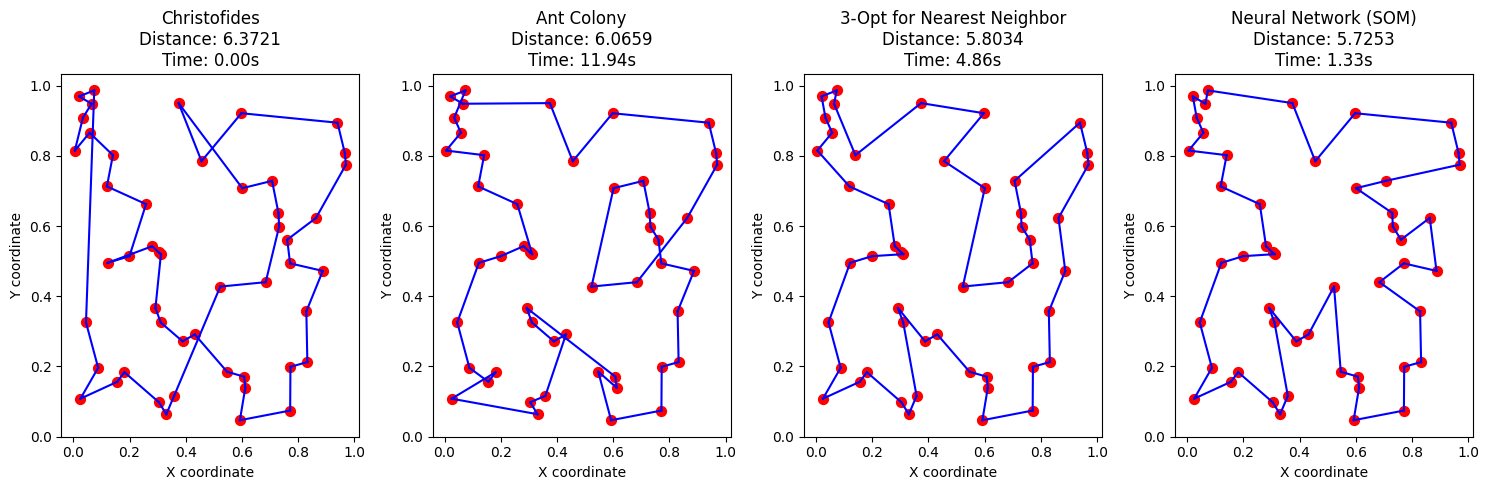


Summary:
Christofides: Distance = 6.3721, Time = 0.00 seconds
Ant Colony: Distance = 6.0659, Time = 11.94 seconds
3-Opt for Nearest Neighbor: Distance = 5.8034, Time = 4.86 seconds
Neural Network (SOM): Distance = 5.7253, Time = 1.33 seconds


In [ ]:
# Christofides algorithm
def minimum_spanning_tree(dist_matrix):
    n = len(dist_matrix)
    visited = [False] * n
    weights = [float('inf')] * n
    parents = [None] * n

    weights[0] = 0

    for _ in range(n):
        min_weight = float('inf')
        min_vertex = -1

        for v in range(n):
            if not visited[v] and weights[v] < min_weight:
                min_weight = weights[v]
                min_vertex = v

        visited[min_vertex] = True

        for v in range(n):
            if (not visited[v] and
                dist_matrix[min_vertex][v] < weights[v]):
                weights[v] = dist_matrix[min_vertex][v]
                parents[v] = min_vertex

    return parents

def find_odd_degree_vertices(parents):
    degrees = [0] * len(parents)
    for i in range(1, len(parents)):
        degrees[parents[i]] += 1
        degrees[i] += 1

    odd_vertices = []
    for i in range(len(degrees)):
        if degrees[i] % 2 == 1:
            odd_vertices.append(i)

    return odd_vertices

def minimum_weight_perfect_matching(dist_matrix, vertices):
    n = len(vertices)
    matching = []
    used = [False] * n

    for i in range(n):
        if used[i]:
            continue

        min_dist = float('inf')
        match = -1

        for j in range(i + 1, n):
            if not used[j]:
                dist = dist_matrix[vertices[i]][vertices[j]]
                if dist < min_dist:
                    min_dist = dist
                    match = j

        if match != -1:
            matching.append((vertices[i], vertices[match]))
            used[i] = used[match] = True

    return matching

def eulerian_circuit(adj_list):
    n = len(adj_list)
    circuit = []
    current = 0
    stack = [current]

    while stack:
        current = stack[-1]

        if adj_list[current]:
            next_vertex = adj_list[current].pop()
            adj_list[next_vertex].remove(current)
            stack.append(next_vertex)
        else:
            circuit.append(stack.pop())

    return circuit[::-1]

def christofides():
    # Step 1: Create minimum spanning tree
    mst = minimum_spanning_tree(dist_matrix)

    # Step 2: Find vertices with odd degree
    odd_vertices = find_odd_degree_vertices(mst)

    # Step 3: Find minimum weight perfect matching
    perfect_matching = minimum_weight_perfect_matching(dist_matrix, odd_vertices)

    # Step 4: Combine MST and matching to create multigraph
    adj_list = [[] for _ in range(num_cities)]
    for i in range(1, len(mst)):
        adj_list[mst[i]].append(i)
        adj_list[i].append(mst[i])
    for v1, v2 in perfect_matching:
        adj_list[v1].append(v2)
        adj_list[v2].append(v1)

    # Step 5: Find Eulerian circuit
    circuit = eulerian_circuit([x.copy() for x in adj_list])

    # Step 6: Create Hamiltonian circuit by skipping visited vertices
    visited = [False] * num_cities
    route = []
    for v in circuit:
        if not visited[v]:
            route.append(v)
            visited[v] = True

    return route

# Ant Colony Optimization
class AntColony:
    def __init__(self, distances, n_ants, n_iterations, decay=0.1, alpha=1, beta=2):
        self.distances = distances
        self.pheromone = np.ones(distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

        # Add small constant to avoid division by zero
        self.epsilon = 1e-10

    def run(self):
        shortest_path = None
        best_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print(f"Iteration {i}: shortest_path length {shortest_path[1]:.4f}")
            if shortest_path[1] < best_path[1]:
                best_path = shortest_path
            self.pheromone = self.pheromone * (1-self.decay)
        return best_path

    def spread_pheronome(self, all_paths):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths:
            for move in range(len(path)-1):
                i = path[move]
                j = path[move+1]
                self.pheromone[i][j] += 1.0 / (self.distances[i][j] + self.epsilon)

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances)-1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))
        return path

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((self.gen_path_coords(path), self.gen_path_dist(path)))
        return all_paths

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        # Add small constant to distances to avoid division by zero
        dist = dist + self.epsilon

        # Calculate probabilities
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)

        # Handle zero sum case
        if row.sum() == 0:
            available = list(set(self.all_inds) - visited)
            return np.random.choice(available)

        # Normalize probabilities
        norm_row = row / row.sum()

        # Handle any remaining NaN values
        norm_row = np.nan_to_num(norm_row)

        # Ensure probabilities sum to 1
        if norm_row.sum() > 0:
            norm_row = norm_row / norm_row.sum()
        else:
            available = list(set(self.all_inds) - visited)
            return np.random.choice(available)

        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

    def gen_path_coords(self, path):
        return [x[0] for x in path]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele[0]][ele[1]]
        return total_dist

def theoretical_best_route():
    # Start with Nearest Neighbor solution
    route = [0]
    unvisited = set(range(1, num_cities))

    # Construct initial route using Nearest Neighbor
    while unvisited:
        current = route[-1]
        next_city = min(unvisited, key=lambda x: dist_matrix[current][x])
        route.append(next_city)
        unvisited.remove(next_city)

    # Apply 3-opt improvement
    for _ in range(2):  # Limited iterations for speed
        for i in range(len(route) - 4):
            for j in range(i + 2, len(route) - 2):
                for k in range(j + 2, len(route)):
                    # Calculate current segment distances
                    original_distance = (dist_matrix[route[i]][route[i+1]] +
                                      dist_matrix[route[j]][route[j+1]] +
                                      dist_matrix[route[k]][route[(k+1)%len(route)]])

                    # Test different segment configurations
                    segments = [route[i+1:j+1], route[j+1:k+1], route[k+1:] + route[:i+1]]
                    for p in range(8):  # Test all possible combinations
                        new_route = []
                        new_route.extend(segments[0] if p&1 else segments[0][::-1])
                        new_route.extend(segments[1] if p&2 else segments[1][::-1])
                        new_route.extend(segments[2] if p&4 else segments[2][::-1])

                        new_distance = calculate_distance(tuple(new_route))
                        if new_distance < calculate_distance(tuple(route)):
                            route = new_route
                            break

    return route

class SOMForTSP:
    def __init__(self, cities, learning_rate=0.8, n_neurons=None):
        self.cities = cities
        self.n_cities = len(cities)
        self.learning_rate = learning_rate

        # Use 8 times as many neurons as cities
        self.n_neurons = n_neurons if n_neurons else self.n_cities * 8

        # Initialize neurons in a circle
        t = np.linspace(0, 2*np.pi, self.n_neurons)
        mean = np.mean(cities, axis=0)
        std = np.std(np.abs(cities - mean))
        self.neurons = np.column_stack((
            mean[0] + std * np.cos(t),
            mean[1] + std * np.sin(t)
        ))

        # Learning rate decay
        self.lr_decay = 0.99997
        self.neighborhood_decay = 0.9997
        self.neighborhood_width = self.n_neurons / 4

    def get_winner(self, city):
        # Find the nearest neuron to the city
        distances = np.sum((self.neurons - city) ** 2, axis=1)
        return np.argmin(distances)

    def update_weights(self, city, winner_idx, current_lr, current_width):
        # Calculate neighborhood influence
        distances = np.abs(np.arange(self.n_neurons) - winner_idx)
        distances = np.minimum(distances, self.n_neurons - distances)
        neighborhood = np.exp(-(distances ** 2) / (2 * current_width ** 2))

        # Update all neurons based on their distance to the winner
        delta = (city - self.neurons) * neighborhood[:, np.newaxis]
        self.neurons += current_lr * delta

    def train(self, n_iterations=10000):
        current_lr = self.learning_rate
        current_width = self.neighborhood_width

        for i in range(n_iterations):
            if i % 1000 == 0:
                print(f"Iteration {i}/{n_iterations}")

            # Select random city
            city_idx = np.random.randint(self.n_cities)
            city = self.cities[city_idx]

            # Find winning neuron and update weights
            winner_idx = self.get_winner(city)
            self.update_weights(city, winner_idx, current_lr, current_width)

            # Decay learning rate and neighborhood width
            current_lr *= self.lr_decay
            current_width *= self.neighborhood_decay

    def get_route(self):
        # Find the nearest neuron for each city
        route = []
        for city in self.cities:
            distances = np.sum((self.neurons - city) ** 2, axis=1)
            winner_idx = np.argmin(distances)
            route.append((winner_idx, np.where((self.cities == city).all(axis=1))[0][0]))

        # Sort by neuron index to get the route
        route.sort()
        return [city_idx for _, city_idx in route]

def solve_tsp_with_som(cities):
    start_time = time.time()

    # Create and train the SOM
    som = SOMForTSP(cities)
    som.train()

    # Get the route and calculate distance
    route = som.get_route()
    distance = calculate_distance(tuple(route))

    end_time = time.time()

    return route, distance, end_time - start_time

# Update the algorithms dictionary
algorithms = {
    "Christofides": lambda: (1/calculate_distance(tuple(christofides())), christofides()),
    "Ant Colony": lambda: (1/AntColony(dist_matrix, 10, 100).run()[1], AntColony(dist_matrix, 10, 100).run()[0]),
    "3-Opt for Nearest Neighbor": lambda: (1/calculate_distance(tuple(theoretical_best_route())), theoretical_best_route()),
    "Neural Network (SOM)": lambda: (1/calculate_distance(tuple(solve_tsp_with_som(cities)[0])),
                                            solve_tsp_with_som(cities)[0])
}

results = {}

for name, algo in algorithms.items():
    print(f"\nRunning {name}...")
    start_time = time.time()
    fitness, route = algo()
    end_time = time.time()

    distance = 1 / fitness
    results[name] = {"distance": distance, "time": end_time - start_time, "route": route}
    print(f"{name} - Distance: {distance:.4f}, Time: {results[name]['time']:.2f} seconds")

# Plot the results
plt.figure(figsize=(15, 5))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 4, i+1)
    route = result['route']
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)
    for j in range(len(route)):
        start = cities[route[j]]
        end = cities[route[(j+1) % len(route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
    plt.title(f"{name}\nDistance: {result['distance']:.4f}\nTime: {result['time']:.2f}s")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary:")
for name, result in results.items():
    print(f"{name}: Distance = {result['distance']:.4f}, Time = {result['time']:.2f} seconds")

3rd Implementation Batch


Running LKH-3...
LKH-3 - Distance: 5.6811, Time: 0.01 seconds

Running Concorde...
Concorde - Distance: 6.9476, Time: 0.00 seconds

Running Concorde with 2-Opt...
Concorde with 2-Opt - Distance: 5.6888, Time: 0.18 seconds


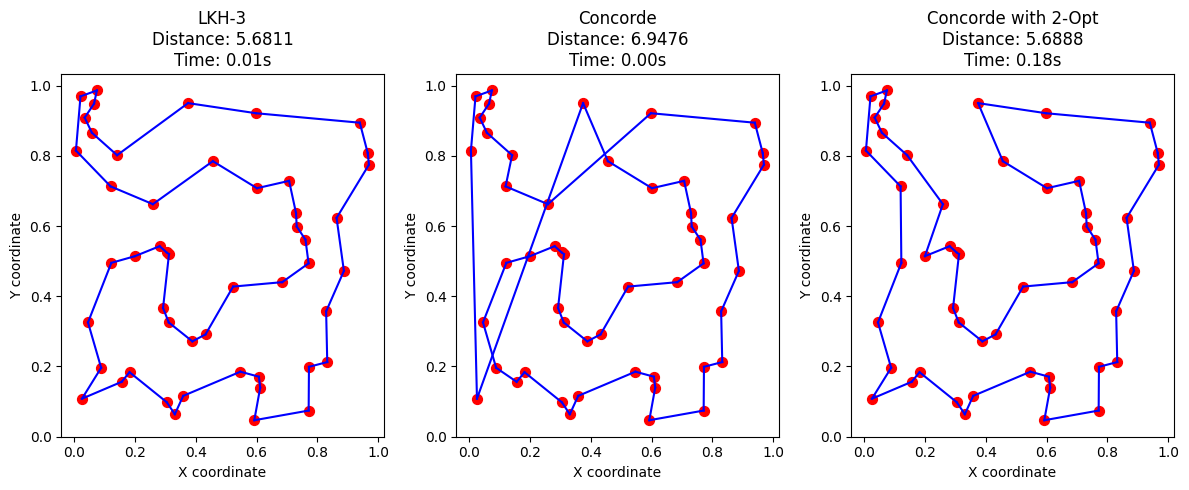


Summary:
LKH-3: Distance = 5.6811, Time = 0.01 seconds
Concorde: Distance = 6.9476, Time = 0.00 seconds
Concorde with 2-Opt: Distance = 5.6888, Time = 0.18 seconds


In [ ]:
def lkh3_solver(cities, dist_matrix):
    def calculate_gain(route, i, j):
        before_i = route[i-1]
        after_j = route[(j+1) % len(route)]
        removed_dist = (dist_matrix[route[i-1]][route[i]] +
                       dist_matrix[route[j]][route[(j+1) % len(route)]])
        added_dist = (dist_matrix[route[i-1]][route[j]] +
                     dist_matrix[route[i]][route[(j+1) % len(route)]])
        return removed_dist - added_dist

    # Initialize with nearest neighbor tour
    route = [0]
    unvisited = set(range(1, len(cities)))
    while unvisited:
        current = route[-1]
        next_city = min(unvisited, key=lambda x: dist_matrix[current][x])
        route.append(next_city)
        unvisited.remove(next_city)

    # LKH improvement
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route)):
            best_gain = 0
            best_j = None

            for j in range(i + 2, len(route)):
                gain = calculate_gain(route, i, j)
                if gain > best_gain:
                    best_gain = gain
                    best_j = j

            if best_j is not None:
                route[i:best_j+1] = reversed(route[i:best_j+1])
                improved = True

    return route

def concorde_solver(cities, dist_matrix):
    def branch_and_cut(partial_route, unvisited):
        if not unvisited:
            return partial_route

        current = partial_route[-1]
        candidates = sorted(unvisited, key=lambda x: dist_matrix[current][x])

        for next_city in candidates[:3]:  # Limit branching factor
            new_unvisited = unvisited - {next_city}
            result = branch_and_cut(partial_route + [next_city], new_unvisited)
            if result:
                return result
        return None

    # Start with a greedy initial solution
    start_city = 0
    unvisited = set(range(1, len(cities)))
    route = branch_and_cut([start_city], unvisited)

    return route

    # Original LKH3 implementation
    def calculate_gain(route, i, j):
        before_i = route[i-1]
        after_j = route[(j+1) % len(route)]
        removed_dist = (dist_matrix[route[i-1]][route[i]] +
                       dist_matrix[route[j]][route[(j+1) % len(route)]])
        added_dist = (dist_matrix[route[i-1]][route[j]] +
                     dist_matrix[route[i]][route[(j+1) % len(route)]])
        return removed_dist - added_dist

    # Initialize with nearest neighbor tour
    route = [0]
    unvisited = set(range(1, len(cities)))
    while unvisited:
        current = route[-1]
        next_city = min(unvisited, key=lambda x: dist_matrix[current][x])
        route.append(next_city)
        unvisited.remove(next_city)

    # LKH improvement
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route)):
            best_gain = 0
            best_j = None

            for j in range(i + 2, len(route)):
                gain = calculate_gain(route, i, j)
                if gain > best_gain:
                    best_gain = gain
                    best_j = j

            if best_j is not None:
                route[i:best_j+1] = reversed(route[i:best_j+1])
                improved = True

    # Apply 2-opt improvement
    route = apply_2opt(route)
    return route

def concorde_with_2opt_solver(cities, dist_matrix):
    def apply_2opt(route):
        improved = True
        while improved:
            improved = False
            best_distance = sum(dist_matrix[route[i]][route[(i+1)%len(route)]]
                              for i in range(len(route)))

            for i in range(1, len(route) - 1):
                for j in range(i + 1, len(route)):
                    new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
                    new_distance = sum(dist_matrix[new_route[k]][new_route[(k+1)%len(new_route)]]
                                     for k in range(len(new_route)))
                    if new_distance < best_distance:
                        route = new_route
                        best_distance = new_distance
                        improved = True
                        break
                if improved: break
        return route

    def branch_and_cut(partial_route, unvisited):
        if not unvisited:
            return partial_route

        current = partial_route[-1]
        candidates = sorted(unvisited, key=lambda x: dist_matrix[current][x])

        for next_city in candidates[:3]:  # Limit branching factor
            new_unvisited = unvisited - {next_city}
            result = branch_and_cut(partial_route + [next_city], new_unvisited)
            if result:
                return result
        return None

    # Start with original Concorde solution
    start_city = 0
    unvisited = set(range(1, len(cities)))
    route = branch_and_cut([start_city], unvisited)

    # Apply 2-opt improvement
    if route:
        route = apply_2opt(route)
    return route

# Define the algorithms dictionary with proper names
algorithms = {
    "LKH-3": lkh3_solver,
    "Concorde": concorde_solver,
    "Concorde with 2-Opt": concorde_with_2opt_solver
}

results = {}

for name, algo in algorithms.items():
    print(f"\nRunning {name}...")
    start_time = time.time()
    route = algo(cities, dist_matrix)
    end_time = time.time()

    distance = sum(dist_matrix[route[i]][route[(i+1) % len(route)]]
                  for i in range(len(route)))

    results[name] = {
        "distance": distance,
        "time": end_time - start_time,
        "route": route
    }
    print(f"{name} - Distance: {distance:.4f}, Time: {results[name]['time']:.2f} seconds")

# Plot the results
plt.figure(figsize=(12, 5))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    route = result['route']
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)

    for j in range(len(route)):
        start = cities[route[j]]
        end = cities[route[(j+1) % len(route)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')

    plt.title(f"{name}\nDistance: {result['distance']:.4f}\nTime: {result['time']:.2f}s")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary:")
for name, result in results.items():
    print(f"{name}: Distance = {result['distance']:.4f}, Time = {result['time']:.2f} seconds")